### Polynomial Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


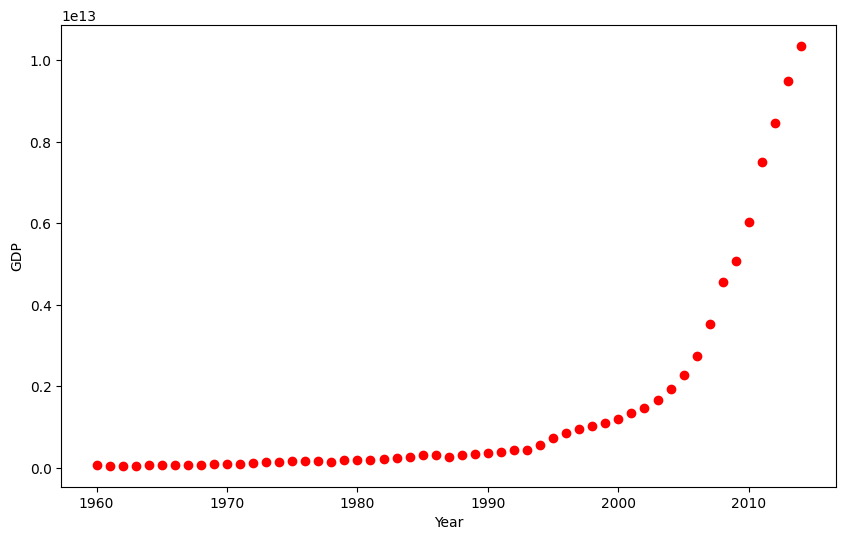

In [37]:
plt.figure(figsize = (10,6))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [38]:
# getting data and Normalization
X = np.asanyarray(df[['Year']])/df['Year'].max()
Y = np.asanyarray(df[['Value']])/df['Value'].max()

##### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [16]:
yhat = model.predict(X)

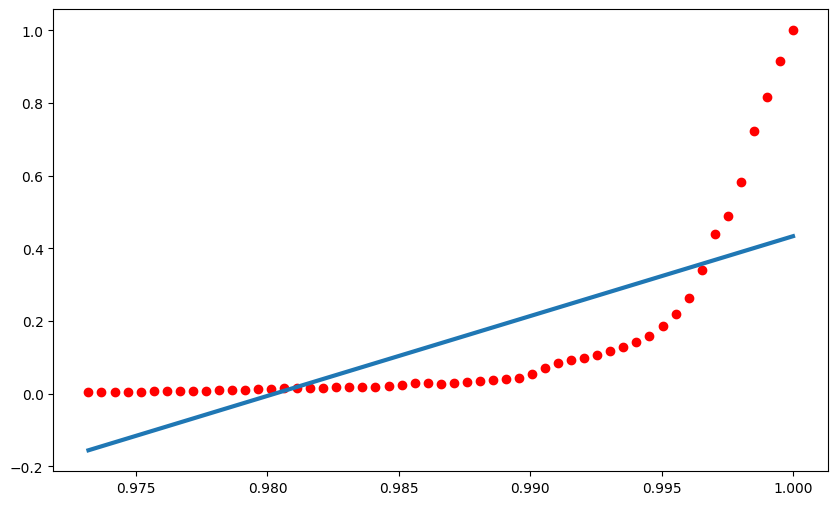

In [18]:
plt.figure(figsize = (10,6))
plt.plot(X, Y, 'ro')
plt.plot(X, yhat, linewidth = 3.0)
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, yhat)
mae

0.12657979406214762

##### Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 5, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [22]:
X_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [23]:
model.fit(X_poly, Y)

LinearRegression()

In [25]:
yhat = model.predict(X_poly)

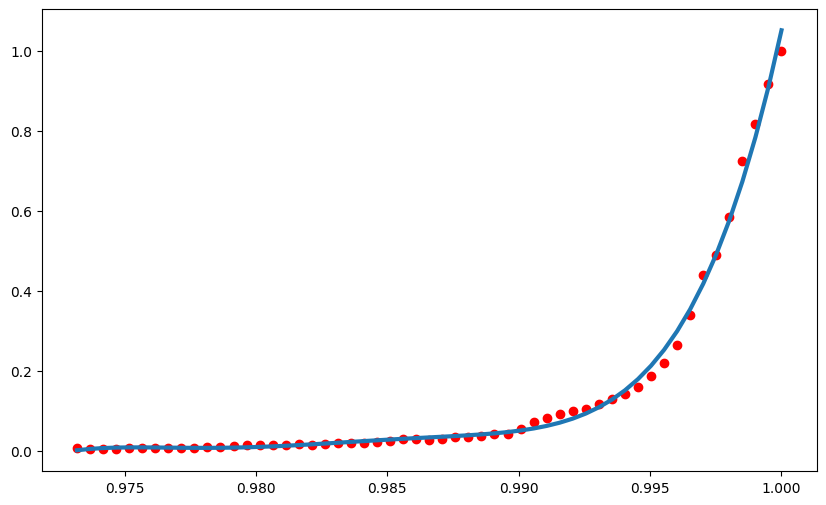

In [27]:
plt.figure(figsize = (10,6))
plt.plot(X, Y, 'ro')
plt.plot(X, yhat, linewidth = 3.0)
plt.show()

In [28]:
print("MAe: ", mean_absolute_error(Y,yhat))

MAe:  0.009253960919999624


#### Pipeline for Polinomial regression

In [41]:
from sklearn.pipeline import Pipeline

Polynomial_Regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=5, include_bias= False)),
    ('model', LinearRegression())
])
Polynomial_Regression.fit(X, Y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])

In [42]:
y_predicted = Polynomial_Regression.predict(X)

In [43]:
MAE = mean_absolute_error(Y, y_predicted)
MAE

0.009253960919999624

#### Curve fit

In [29]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [30]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [31]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517118227653
beta2=0.9972071272524615


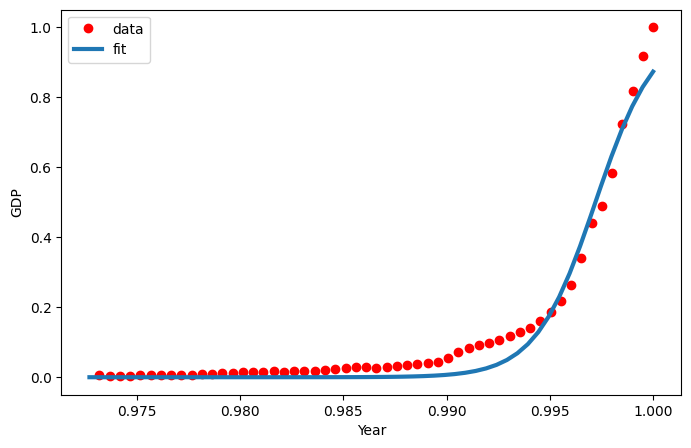

In [32]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [33]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.03049841883900717
